# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('test.csv')
dataset

,Month,Fellow Name,Center Name,Total Number OoSC and Out Of School Children Identified,Total Number OoSC and Out Of Children Enrolled In Learning Center,The Total Classes Conducted this month.,Hindi,English,EVS,Math,...,"Number of training on classroom intervention, behaviour management cycle and culture & Values",Number of community visits made to identify and understand local problems,Number of Community event organised to mobilize stakeholders,"Number of parents attended workshops/training (PTM, SMC)",Number of parents joined/participated in awareness drives and campaigns.,Number of community members attended community events and program organized for mobilization,Number of parents visited Anubhuti learning centers,Number of parents had one on one conversations with fellows during the field visit.,Thank You for Filling the Form - Please Rate you experience or day,Location
0,April,"Priyanka, Na",GPS Palra,25,25,130,12,8,7,10,...,0,2,0,18,0,0,23,23,5,Gurugram - Sohna Block
1,April,"Pooja, Rani",GGPS Badshahpur,25,25,57,8,8,9,9,...,2,1,2,2,1,1,6,3,2,Gurugram - Sohna Block
2,April,"Neetu, Gautam",GGPS Badshahpur,26,26,45,10,12,10,11,...,6,7,0,2,22,18,22,16,1,Gurugram - Sohna Block
3,April,"Kirti, Devi",GGPS Badshahpur,26,26,64,16,16,16,16,...,8,8,0,2,18,18,20,15,4,Gurugram - Sohna Block
4,April,"Priyanka, Azad",GPS Sohna,24,24,25,5,5,5,5,...,3,4,3,1,5,5,4,4,2,Gurugram - Sohna Block
5,April,"Sapna, Sapna",GGPS Badshahpur,25,25,25,2,2,1.3,1.3,...,2,8,0,4,15,15,20,10,2,Gurugram - Sohna Block
6,April,"Suresh kumari, Mrs",GGPS Sohna - 2,25,21,22,3 :45,3:45,3:45,3:45,...,0,20,0,0,0,0,2,5,3,Gurugram - Sohna Block
7,April,"Amrita, Yadav",GPS Nayagaon,25,25,25,4,4,4,4,...,2,4,2,1,4,4,5,4,3,Gurugram - Sohna Block
8,April,"Kavita, Kumari",GGPS Sohna - 1,25,25,23,13,15,17,16,...,3,8,0,20,20,18,22,22,5,Gurugram - Sohna Block
9,April,"Rekha Rani, Rekha",GPS Palra,25,23,66,10:20,10:20,11:40,11:40,...,0,5,0,13,0,1,14,14,5,Gurugram - Sohna Block


In [3]:
X = dataset.iloc[:, [10,11]].values
X

array([[23,  2],
       [22,  4],
       [26,  0],
       [20,  8],
       [88,  4],
       [18,  8],
       [14,  0],
       [88,  4],
       [22,  0],
       [80,  2]])

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  """


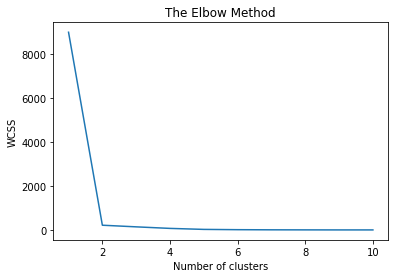

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [5]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

## Saving the Model

In [6]:
#Save the model.
import pickle
pickle.dump(kmeans, open("model.pkl", "wb"))

## Loading model


In [7]:
kmeans_model = pickle.load(open("model.pkl", "rb"))

## Visualising the clusters

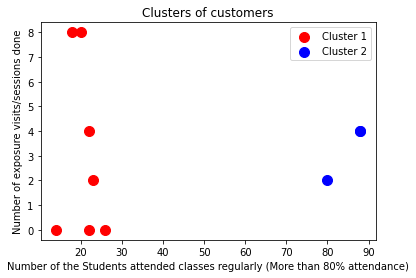

In [8]:
y_kmeans = kmeans_model.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Number of the Students attended classes regularly (More than 80% attendance)')
plt.ylabel('Number of exposure visits/sessions done') 
plt.legend()
plt.show()


In [9]:
c1 = [X[y_kmeans == 0, 0],X[y_kmeans == 0, 1]] # cluster 1 co-ordinates
c2 = [X[y_kmeans == 1, 0],X[y_kmeans == 1, 1]] # cluster 2 co-ordinates

In [10]:
c1

[array([23, 22, 26, 20, 18, 14, 22]), array([2, 4, 0, 8, 8, 0, 0])]

In [11]:
c2

[array([88, 88, 80]), array([4, 4, 2])]